In [ ]:
import pandas as pd
import numpy as np

data_set_path = 'data.csv'
data_set = pd.read_csv(data_set_path, sep=';')

print(data_set.dtypes)
print(data_set.describe())

Номер               object
Район               object
Тип дома            object
Общая              float64
Жилая              float64
Кухня              float64
Цена. тыс. руб.    float64
dtype: object
            Общая       Жилая       Кухня  Цена. тыс. руб.
count  183.000000  183.000000  183.000000       183.000000
mean    44.222951   23.418033    9.360656      1326.020410
std     11.701288    8.030297    2.983855       224.119429
min     23.000000    8.000000    5.000000       599.400000
25%     35.000000   18.000000    7.000000      1200.000000
50%     42.000000   20.000000   10.000000      1358.000000
75%     51.000000   28.000000   11.000000      1491.750000
max     91.000000   52.000000   19.000000      1674.000000


In [42]:
columns_of_interest = ['Район', 'Тип дома']
two_columns_of_data = data_set[columns_of_interest]

print(pd.Series.unique(data_set['Район']))
print(pd.Series.unique(data_set['Тип дома']))

['ЮМР' 'Центр' 'ЧМР' 'СМР' '40-лет Победы' 'Авиагородок' 'Витаминкомбинат'
 'ГМР' 'ЗИП' 'ККБ' 'КМР' 'ФМР' 'СХИ' 'Мосты' 'Рос-кая' 'ПМР']
['блочный' 'кирпичный' 'монолитный' 'каркасный']


In [43]:
dummies = pd.get_dummies(two_columns_of_data)

print(dummies)

     Район_40-лет Победы  Район_Авиагородок  Район_Витаминкомбинат  Район_ГМР  \
0                      0                  0                      0          0   
1                      0                  0                      0          0   
2                      0                  0                      0          0   
3                      0                  0                      0          0   
4                      0                  0                      0          0   
5                      0                  0                      0          0   
6                      1                  0                      0          0   
7                      1                  0                      0          0   
8                      1                  0                      0          0   
9                      1                  0                      0          0   
10                     0                  1                      0          0   
11                     1    

In [44]:
# выбираем то чта нам интересно для анализа
columns_of_interest = ['Общая', 'Жилая', 'Кухня', 'Цена. тыс. руб.']
data_model = data_set[columns_of_interest]

data_model = pd.concat([data_model, pd.get_dummies(data_set['Район'])], axis=1)
data_model = pd.concat([data_model, pd.get_dummies(data_set['Тип дома'])], axis=1)

print(data_model)

     Общая  Жилая  Кухня  Цена. тыс. руб.  40-лет Победы  Авиагородок  \
0     40.0   20.0   10.0         1596.000              0            0   
1     37.0   17.0    8.0         1344.000              0            0   
2     38.0   18.0    9.0         1148.000              0            0   
3     27.0   14.0    6.0          686.000              0            0   
4     30.0   17.0    6.0         1008.000              0            0   
5     34.0   17.0   12.0         1176.000              0            0   
6     35.0   18.0    7.0         1140.000              1            0   
7     40.0   20.0   10.0         1450.000              1            0   
8     40.0   20.0   10.0         1400.000              1            0   
9     44.0   22.0   11.0          980.000              1            0   
10    40.0   20.0   10.0         1250.000              0            1   
11    43.0   16.0   10.2         1500.000              1            0   
12    50.0   20.0   10.0         1600.000          

In [53]:
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# значения атрибутов в пространтсве
X = data_model.as_matrix()

# kmeans = KMeans(n_clusters=50).fit(X)
kmeans = AffinityPropagation().fit(X)

# находим центры кластеров
y_kmeans = kmeans.predict(X)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Anton\venv\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5,0,'S кухня')

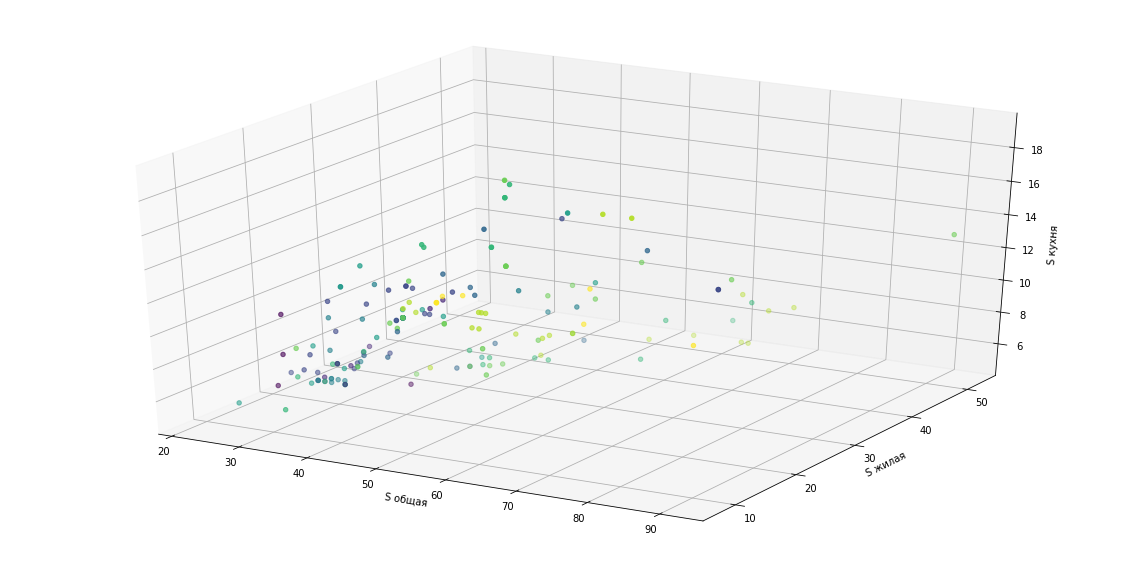

In [54]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

figure = plt.figure().gca(projection='3d')
figure.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_kmeans, cmap='viridis')
figure.set_xlabel('S общая')
figure.set_ylabel('S жилая')
figure.set_zlabel('S кухня')

# fig, ax = plt.subplots(1,2)

# ax[0].scatter(X[:, 0], X[:, 1], X[:, 2], c=y_kmeans, cmap='viridis')
# ax[1].scatter(X[:, 2], X[:, 3], c=y_kmeans, cmap='viridis')

# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')

[(27.0, 14.0), (44.0, 22.0), (40.0, 20.0), (40.0, 20.0), (37.0, 19.0), (34.0, 17.0), (45.0, 28.0), (51.0, 21.0), (56.0, 42.0), (57.0, 30.0)]


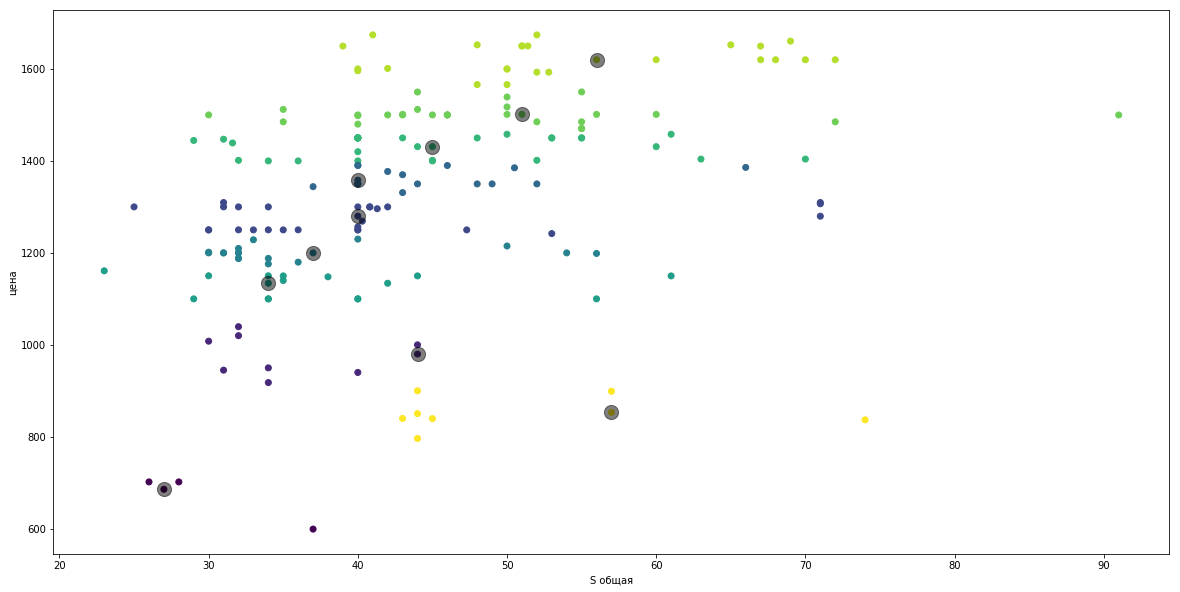

In [55]:
centers = kmeans.cluster_centers_

print(list(zip(centers[:, 0], centers[:, 1])))

plt.scatter(X[:, 0], X[:, 3], c=y_kmeans, cmap='viridis')
plt.xlabel('S общая')
plt.ylabel('цена')
plt.scatter(centers[:, 0], centers[:, 3], c='black', s=200, alpha=0.5);